# Customer Segmentation For Market Analysis
Based on KMeans Clustering Analysis, it segregates customers into different segments so that we can identify the different groups entering into the mall and applying different marketing strategies to a particular customer based on the group it belongs. It helps in improving decision making for the best marketing strategies.

In [21]:
#import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### Loading the dataset
The dataset used is Mall_Customers.csv<br> **Dataset Description**<br> The dataset have 5 columns:
- CustomerId: id which is assigned to each customer entering the mall
- Genger: the gender of the customer entering the mall
- Age: it is the age of the customer
- Annual Income: it is the annual income of the customer
- Spending Score: It is assigned to the customer based on their behaviour and purchsing items from the mall 

In [193]:
data=pd.read_csv("./Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Analysis and Visualization

In [23]:
data.shape

(200, 5)

The dataset have 200 rows and 5 columns

In [24]:
#Gathering the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [44]:
#Description of the dataset
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [25]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no null values in the dataset

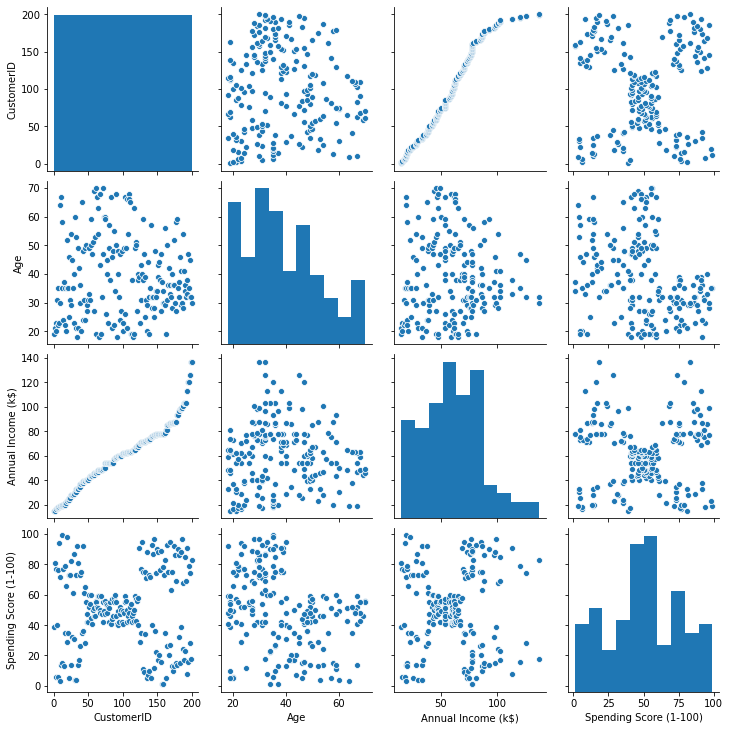

In [26]:
#Visualising the pairwise data in the dataset
sns.pairplot(data)
plt.show()

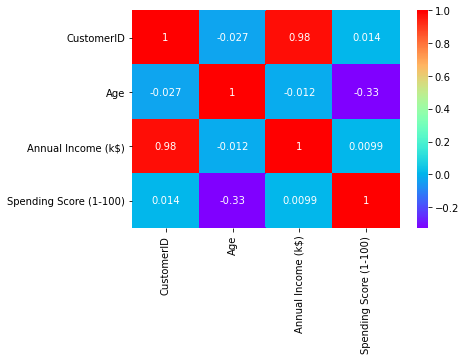

In [27]:
#Checking the corelation between the features using the heat map
sns.heatmap(data.corr(),annot=True,cmap='rainbow')
plt.show()

The plot tells that 'CustomerID' and 'Annual Income' are highly corelated while 'age' and 'Spending Score' are negatively corelated.

In [28]:
#Installing the dabl library
!pip install dabl

  Created wheel for dabl: filename=dabl-0.1.9-py3-none-any.whl size=572793 sha256=096016a7dbc99cade8b2674bee628b3232685f5e69ac30dac6c4befeaf68094e
  Stored in directory: c:\users\saumya pande\appdata\local\pip\cache\wheels\63\d2\62\c3ee6bbd1c1f0d7b7d9dbb96a4f5d59c35c08c70662d7695aa
Successfully built dabl


In [29]:
import dabl

Data Analysis BaseLine Library(dabl) can be used to automate many of the tasks that seem repetitive in the early stages of model development.<br> **Performing Data Preproceesing, Visualization and Analysis Uaing dabl:**

In [32]:
#Data Preprocessing
data_clean=dabl.clean(data,verbose=1)

Detected feature types:
0 float, 4 int, 1 object, 0 date, 0 other
Interpreted as:
continuous      3
dirty_float     0
low_card_int    0
categorical     1
date            0
free_string     0
useless         1
dtype: int64


Here, Continuous: This is the number of columns containing continuous values and columns with high cardinality, dirty_float: float variables that sometimes take string value, date: Columns with date in them, useless: Constant or integer values that do not match with any of the categories are given a name useless, free_string: string data types which contain multiple unique values are labelled as free_string, Categorical: This is the number of columns containing pandas categorical values in a string, integer or floating-point formats. 

In [34]:
dabl.detect_types(data_clean)

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
Gender,False,False,False,True,False,False,False
Age,True,False,False,False,False,False,False
Annual Income (k$),True,False,False,False,False,False,False
Spending Score (1-100),True,False,False,False,False,False,False


Target looks like regression


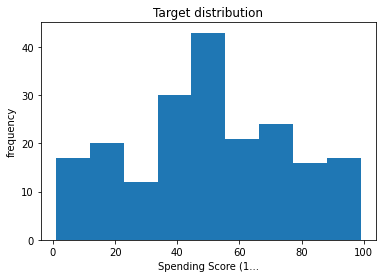

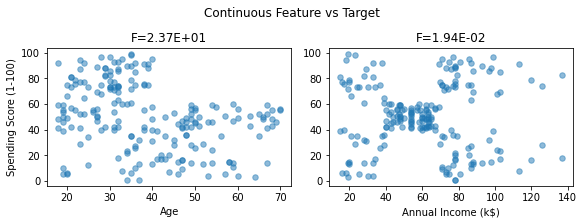

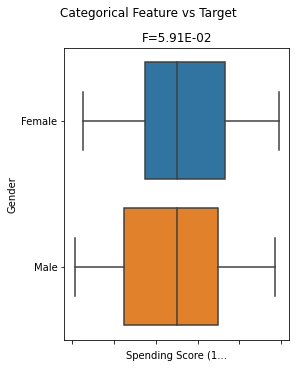

In [41]:
#Visualizing the Spending Score with all the columns
dabl.plot(data,target_col='Spending Score (1-100)')

It identifies what type of data is present in the target, categorical or continuous, and then displays the appropriate graph.
In this case it specifies 'Target looks like regression'.<br> We can infer following points from the graph
- the frequency of spending score is high between 50-55.
- the spending score is dense between age 20-50 and sparse beyond it
- the spending score is quite high for customers with annual income 10,000 and 70,000 
- females have higher spending score than male

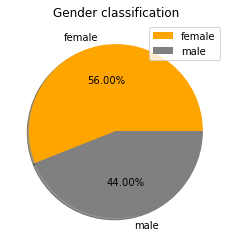

In [73]:
#Gender distribution of the people entering the mall
labels=['female','male']
size=data['Gender'].value_counts()
color=['orange','grey']
plt.pie(size,colors=color,labels=labels,shadow=True,autopct='%.2f%%')
plt.title('Gender classification')
plt.legend()
plt.show()

We can conclude that there are more female shoppers(56%) than male(44%)

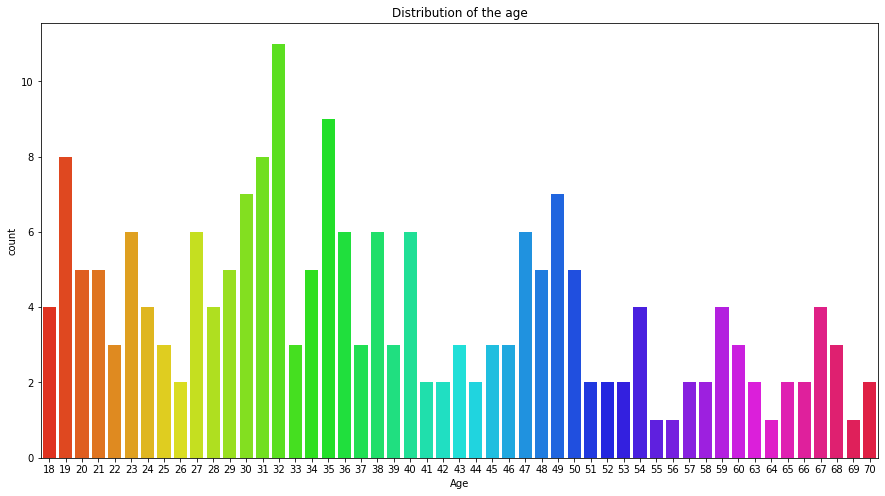

In [69]:
#Age distribution of the people entering the mall
plt.figure(figsize=(15,8))
sns.countplot(data['Age'],palette='hsv')
plt.title("Distribution of the age")
plt.show()

We can see thet their is no clear pattern. But we can see that old age people are less frequent than young aged or middle aged. The people of age 32 are most frequent.

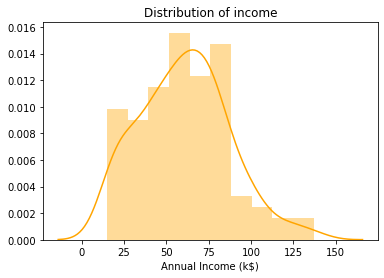

In [70]:
#Annual Income distribution of the people entering the mall
sns.distplot(data['Annual Income (k$)'],color='orange')
plt.title("Distribution of income")
plt.show()

There are more customers in the mall with annual income of 50,000 to 75,000 income.

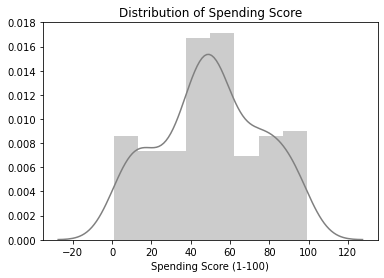

In [72]:
#Spending Score distribution  of the people entering the mall
sns.distplot(data['Spending Score (1-100)'],color='grey')
plt.title("Distribution of Spending Score")
plt.show()

Most of the customers have their Spending Score between 35 to 60.

## KMeans Clustering Analysis

KMeans Clustering Algorithm
KMeans Algorithm is one of Unsupervised Learning Algorithm . It is algorithm for clustering where data points that are in the same group exhibit similar features. It consist of k clusters where the algorithm tries to fit the data point in exactly one cluster.These are the following steps that are being performed in this algorithm:

Specify the number of clusters k.
Initialize centroid by randaomly selecting k data points.
Keep iterating util there is n change in the centroid i.e. assignment of data pointsto the clusters.
Compute sum of the squared distance (Euclidean Distance) between data points and the distance
Assign each data point to the clusterwhere the distance is minimum.
Compute the centroid for the clusters by taking the average of all the data points that belong to a cluster.
Hence, KMeans tries to simultaneously
1. Minimize the distance between points in a cluster.
2. Maximize the distance between clusters.
Sometimes the KMeans get stuck in local minima and cannot converge to the global minima for that we can try initializing the K value for number of times and choose the value with lowest sum of square error.
Choosing the value of k:
Elbow Method: It plots the number of clusters vs Sum of square error(SSE), where SSE=$\sum_(i=0)^ndist(x_i-c_i)^2+\sum_(i=1)^ndist(x_i-c_i)^2 --$, and picking the elbow of the curve as the number of clusters(k) to use. As the cluster size increases the SSE becomes zero.

### Elbow Method: to calculate number of clusters

In [194]:
def elbow(X):
    SSE=[]
    k_range=range(1,11)
    for k in k_range:
        Km=KMeans(n_clusters=k)
        Km.fit(X)
        SSE.append(Km.inertia_)
    plt.plot(k_range,SSE)
    plt.xlabel('Number of Clusters(K)')
    plt.ylabel("Sum of Square Error(SSE)")
    plt.title("Elbow Plot")
    plt.show()

#### Clustering Betweeen Spending Score and Annual Income

In [195]:
X=data.loc[:,['Spending Score (1-100)','Annual Income (k$)']].values
print(X.shape)

(200, 2)


In [196]:
X_df=pd.DataFrame(X)
X_df.head()

,0,1
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


0:Spending Score<br>1:Annual Income

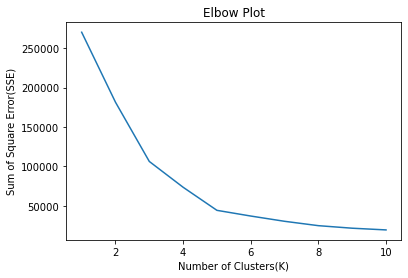

In [197]:
elbow(X_df)

With an increase in cluster there is drop in SSE. We can use K=5

In [198]:
#Scaling the variables in X Annual Income and Spending Score
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

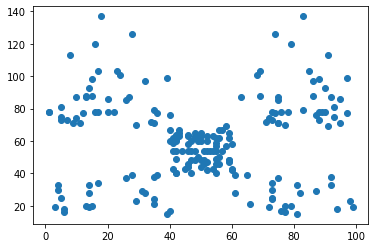

In [199]:
#Plotting the Scatter Plot
plt.scatter(data['Spending Score (1-100)'],data['Annual Income (k$)'])

In [200]:
Km=KMeans(n_clusters=5)
y=Km.fit_predict(X)
print(y)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 1 4 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 2 3 1 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3 1 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


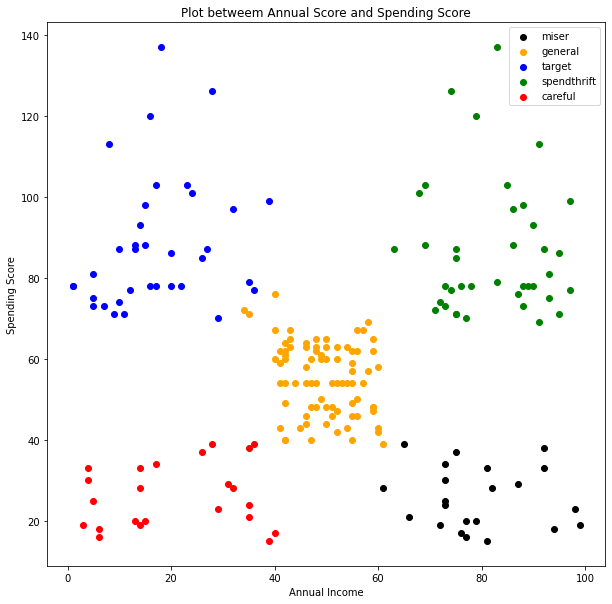

In [201]:
#Visualizing the data 
df1=X_df[y==0]
df2=X_df[y==1]
df3=X_df[y==2]
df4=X_df[y==3]
df5=X_df[y==4]

plt.figure(figsize=(10,10))
plt.scatter(df1[0],df1[1],color='black',label='miser')
plt.scatter(df2[0],df2[1],color='orange',label='general')
plt.scatter(df3[0],df3[1],color='blue',label='target')
plt.scatter(df4[0],df4[1],color='green',label='spendthrift')
plt.scatter(df5[0],df5[1],color='red',label='careful')
plt.xlabel('Annual Income')
plt.ylabel("Spending Score")
plt.title("Plot betweem Annual Score and Spending Score")
plt.legend()
plt.show()

#### Clustering betwen Age and Spending Score

In [180]:
X=data.loc[:,['Spending Score (1-100)','Age']].values
X_df1=pd.DataFrame(X)
X_df1.head()

,0,1
0,39,19
1,81,21
2,6,20
3,77,23
4,40,31


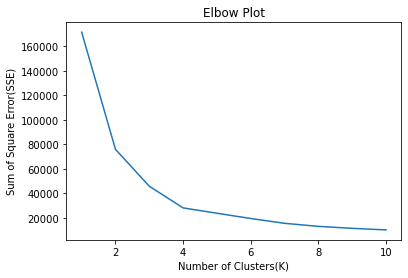

In [181]:
elbow(X_df1)

The Number of clusters(K)=4 according to elbow method

In [182]:
#Clculating KMeans for the plot
km=KMeans(n_clusters=4)
y=km.fit_predict(X_df1)
print(y)

[2 0 1 0 2 0 1 0 1 0 1 0 1 0 1 0 2 2 1 0 2 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1
 0 1 0 3 0 3 2 1 2 3 2 2 2 3 2 2 3 3 3 3 3 2 3 3 2 3 3 3 2 3 3 2 2 3 3 3 3
 3 2 3 2 2 3 3 2 3 3 2 3 3 2 2 3 3 2 3 2 2 2 3 2 3 2 2 3 3 2 3 2 3 3 3 3 3
 2 2 2 2 2 3 3 3 3 2 2 2 0 2 0 3 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0 2 0 1 0 3 0
 1 0 1 0 1 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 2
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


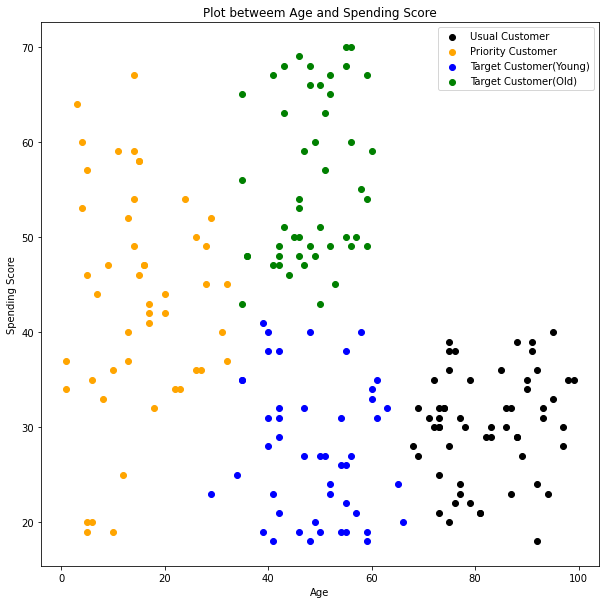

In [186]:
#Visualizing the data 
df1=X_df1[y==0]
df2=X_df1[y==1]
df3=X_df1[y==2]
df4=X_df1[y==3]

plt.figure(figsize=(10,10))
plt.scatter(df1[0],df1[1],color='black',label='Usual Customer')
plt.scatter(df2[0],df2[1],color='orange',label='Priority Customer')
plt.scatter(df3[0],df3[1],color='blue',label='Target Customer(Young)')
plt.scatter(df4[0],df4[1],color='green',label='Target Customer(Old)')

plt.xlabel('Age')
plt.ylabel("Spending Score")
plt.title("Plot betweem Age and Spending Score")
plt.legend()
plt.show()


### Conclusion
- In this project, you have Found that there are 5 distinct groups of customers based on annual income and spending score.
- Found that 4 different groups based on age and spending score which can help you in making data-driven marketing strategies.